# Using Metadensity in Jupter notebooks
This notebook showcases SF3B4, U2 density around branchpoints

In [1]:
# set up files associated with each genome coordinates
import metadensity as md
md.settings.from_config_file('/home/hsher/projects/Metadensity/config/hg38.ini')


# then import the modules
from metadensity.metadensity import *
from metadensity.plotd import *
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# I have a precompiles list of ENCODE datas as a csv that loads in this dataloader
import sys
sys.path.append('/home/hsher/projects/Metadensity/scripts')
from dataloader import *
%matplotlib inline

plt.style.use('seaborn-white')

please set the right config according to genome coordinate
Using /home/hsher/gencode_coords/GRCh38.p13.genome.fa
Using:  /home/hsher/gencode_coords/gencode.v33.transcript.gff3


## load RBPs into eCLIP object

In [2]:
rbm22 = eCLIP.from_series(encode_data.loc[(encode_data['RBP'] == 'RBM22')&(encode_data['Cell line'] == 'HepG2')].iloc[0],
                          single_end = False)

In [3]:
clips = [rbm22]

# Calulcate Density and Truncation sites
Object `Metatruncation` and `Metadensity` takes three things:
1. an experiment object `eCLIP` or `STAMP`.
2. a set of transcript pyBedTools that you want to plot on
3. name of the object

Options include:
1. `sample_no=` allows you to decide how many transcript you want to build the density. It will take longer. By default, `sample_no=200`. So in transcript if you give more than 200 transcripts, only 200 will be used
2. `metagene` allows you to use pre-built metagene. This feature is more useful when you want to compare the same set of RNA over many RBPs.
3. `background_method` handles how you want to deal with IP v.s. Input
4. `normalize` handles how you want to normalize values within a transcript.

## Difference between truncation and density

`Metadensity` represents read coverage. `Metatruncation` represents the 5' end of read 2 for `eCLIP`; edit sites for `STAMP`.

In [4]:
# here for the set of transcript, we use the IDR peak containing transcript assuming they have good signal
def build_idr_metadensity(eCLIP):
    ''' build metadensity object for eCLIP and its idr peak containing transcript'''
    m = Metadensity(eCLIP, eCLIP.name,background_method = 'relative information', normalize = False)
    m.get_density_array()
    return m

In [5]:
# this step takes some time for building metagene from the annotation files.
den = [build_idr_metadensity(e) for e in clips]

Using: /home/hsher/projects/Metadensity/metadensity/data/hg38/gencode
Done building metagene
need at least one array to concatenate


## Visualize RBP map: individual density per transcript

use `feature_to_show` to decide what features to show. 

In [6]:
help(plot_rbp_map)

Help on function plot_rbp_map in module metadensity.plotd:

plot_rbp_map(metas, alpha=0.6, ymax=0.001, features_to_show=['exon', 'intron'], sort=False, rep_handle='mean', cmap='Greys')
    get a bunch of Metadensity or Metatruncation Object, plot their individual density in a heatmap
    metas: list of Metadensity or Metatruncate object
    alpha: transparency in plt.plot()
    ymax: the max value in plt.set_ylim()
    features_to_show: list of genomic/transcriptomic features to show. options include all feature names. You can also use pre-set combinations such as `generic_rna`, `protein_coding` etc. Use metadensity.density_array to see what is available
    sort: whether to sort RNAs (rows in RBPmap) "lexicographically". setting true will make RNA with similar binding pattern cluster together on a map
    rep_handle: 'mean' to plot the mean of 2 reps. 'concat' to show 2 reps individually. specify rep keys like 'rep1', 'rep2' to show only that rep.
    cmap: color map to use



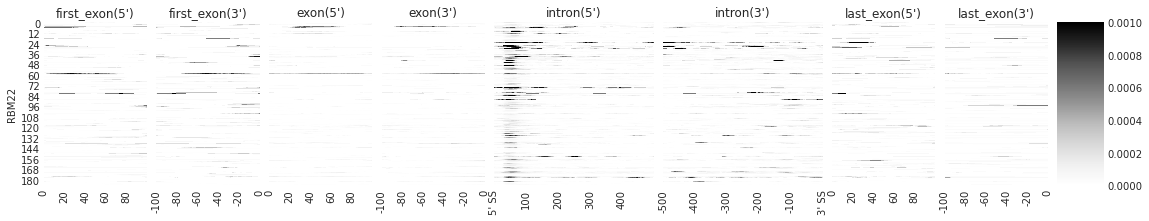

In [7]:
### PLOT INDIVIDUAL DENSITY
# you can customize the list of features you want to show. This is suitable when you are looking for splicing
f = plot_rbp_map(den, features_to_show = generic_rna, rep_handle = 'rep1')

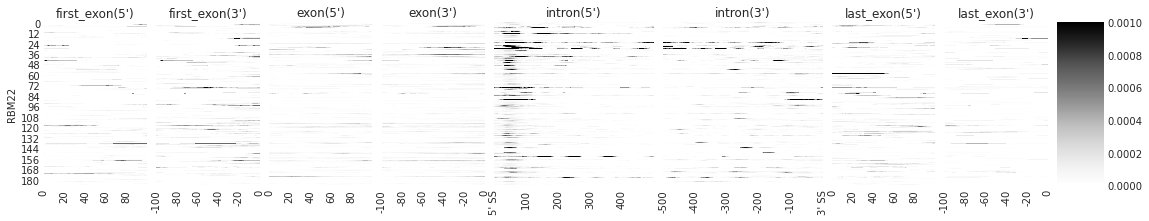

In [8]:
f = plot_rbp_map(den[:1], features_to_show = generic_rna, rep_handle = 'rep2')

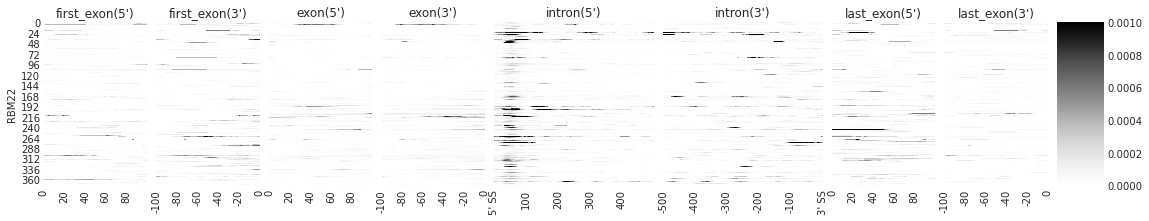

In [9]:
f = plot_rbp_map(den[:1], features_to_show = generic_rna, rep_handle = 'concat')

# Median and Mean density

In [10]:
color_dict = {'SF3B4': 'royalblue', 'SF3A3':'mediumorchid', 'U2AF1':'tomato', 'U2AF2': 'gold'}

Text(0, 0.5, 'mean relative information')

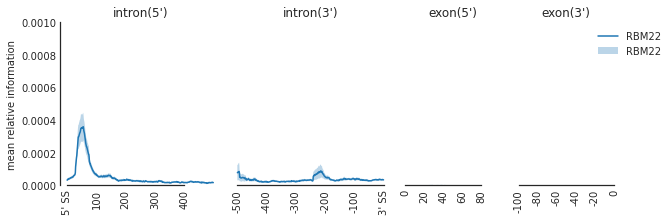

In [11]:
f=plot_mean_density(den,
                    features_to_show = ['intron', 'exon'],
                   rep_handle = 'rep1')
f=beautify(f, offset = 0) # sns.despine 
f.get_axes()[0].set_ylabel('mean relative information')

Text(0, 0.5, 'mean relative information')

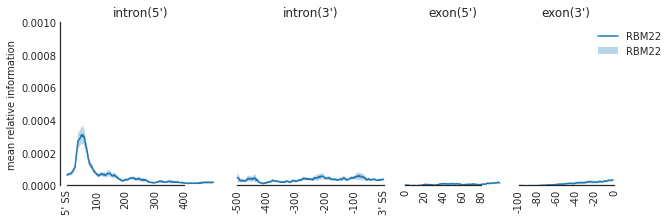

In [12]:
f=plot_mean_density(den,
                    features_to_show = ['intron', 'exon'],
                   rep_handle = 'rep2')
f=beautify(f, offset = 0) # sns.despine 
f.get_axes()[0].set_ylabel('mean relative information')

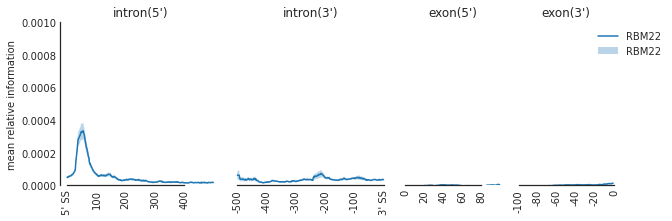

In [13]:
f=plot_mean_density(den,
                    features_to_show = ['intron', 'exon'],
                   rep_handle = 'concat')
f=beautify(f, offset = 0) # sns.despine 
f.get_axes()[0].set_ylabel('mean relative information')
f.savefig('SF3B4_rna.svg', dpi = 300)